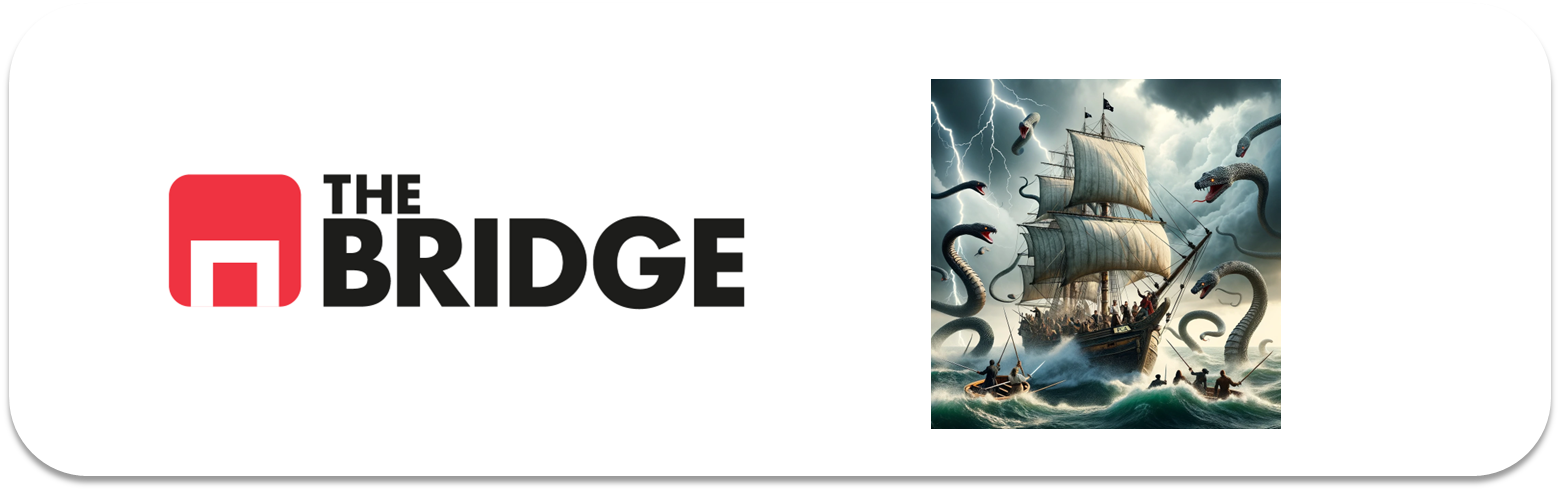

## PRACTICA OBLIGATORIA: **Seleccion Features**

* La práctica obligatoria de esta unidad consiste en hacer una comparativa de diferentes técnicas de selección de features sobre un dataset ya conocido. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Descripción General y Objetivo

El objetivo de la práctica es que juegues con las diferentes técncias de selección de features sobre un problema de clasificación. Para ello, tendrás que cargar el dataset de credit scoring que tienes en la carpeta "data" y que ya hemos trabajado anteriormente. A partir de ahí tendrás que probar diferentes técnicas de selección de features y compararlas todas entre sí y escoger finalmente el conjunto más sencillo con más potencia. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import bootcampviztools as bt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, HistGradientBoostingClassifier
from catboost import CatBoostClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import make_scorer, recall_score, classification_report, ConfusionMatrixDisplay

import warnings
warnings.filterwarnings("ignore", category=UserWarning)

### Detalles e Instrucciones

El objetivo es que construyas un modelo final de clasificació sobre la variable "SeriousDlqin2yrs" del dataset que encontrarás en "data".  

Sigue los pasos del proceso de ML que hemos aprendido para problemas supervisados con el dataset que encontrarás en "data" pero con las siguiente salvedades:

1. Deshazte de las filas con nulos, para este ejercicio no nos importan. Convierte las features NumberOf... que creas conveniente a categóricas con 2 o 3 niveles a lo sumo.

2. A la hora de hacer el miniEda aplica los siguientes análisis y selección de features: 
    1. Análisis visual combinado con filtrado por valores de correlación y umbral de covarianza.
    2. Selección de features numéricas mediante SelectKBest y ANOVA, selecció de features categóricas mediante Mutual Information 
    3. Selección de las mejores features a través de un modelo intermedio (usando SelectFromModel)
    4. Selección de las mejores features empleando RFE.
    5. Selección de las mejores features empleando SFS.
    6. Selección de las mejores features mediante un sistema de hard-voting aplicado a lo obtenido en los pasos 1 a 5 anteriores.

    Para cada paso anterior (salvo el 1) se pide obtener una lista de features de "primera división" con un número de variables no superior a 6 (pueden ser menos).

3. Escoge tres modelos y a la hora compararlos para escoger el mejor, entrenalos con validación cruzada empleando las seis listas obtenidas anteriormente. Es decir tendrás 18 (6*3) medidas (emplea la métrica que creas más conveniente y si no se te ocurre ninguna el recall medio).  Escoge el mejor modelo y la mejor selección de features.

4. Optimiza los hiperparámetros del mejor modelo. Evalúalo contra test.


In [3]:
df = pd.read_csv('./data/credit_npo.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12537 entries, 0 to 12536
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   SeriousDlqin2yrs                      12537 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  12537 non-null  float64
 2   age                                   12537 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  12537 non-null  int64  
 4   DebtRatio                             12537 non-null  float64
 5   MonthlyIncome                         11816 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       12537 non-null  int64  
 7   NumberOfTimes90DaysLate               12537 non-null  int64  
 8   NumberRealEstateLoansOrLines          12537 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  12537 non-null  int64  
 10  NumberOfDependents                    12360 non-null  float64
dtypes: float64(4), 

In [4]:
target = 'SeriousDlqin2yrs'

In [5]:
df.head(5)

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,0,0.081892,37,0,0.070709,5656.0,12,1,0,0,0.0
1,0,0.023413,74,0,0.209197,4870.0,9,0,1,0,0.0
2,0,0.000000,43,0,0.080784,5000.0,2,0,0,0,2.0
3,0,0.492754,44,0,0.412735,7333.0,4,0,2,0,3.0
4,0,1.000000,63,0,0.000000,8333.0,3,0,0,0,1.0


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SeriousDlqin2yrs,12537.0,0.068916,0.253321,0.0,0.000000,0.000000,0.000000,1.0
RevolvingUtilizationOfUnsecuredLines,12537.0,0.330359,0.368148,0.0,0.030651,0.163490,0.582219,6.0
age,12537.0,52.079445,15.077498,21.0,41.000000,51.000000,62.000000,101.0
NumberOfTime30-59DaysPastDueNotWorse,12537.0,0.409588,4.055787,0.0,0.000000,0.000000,0.000000,98.0
DebtRatio,12537.0,1.902253,9.122216,0.0,0.142268,0.302025,0.506725,99.0
MonthlyIncome,11816.0,6864.815420,11855.905437,0.0,3498.750000,5416.000000,8300.000000,702500.0
NumberOfOpenCreditLinesAndLoans,12537.0,8.482332,5.165422,0.0,5.000000,8.000000,11.000000,49.0
NumberOfTimes90DaysLate,12537.0,0.259312,4.035658,0.0,0.000000,0.000000,0.000000,98.0
NumberRealEstateLoansOrLines,12537.0,0.999202,1.134325,0.0,0.000000,1.000000,2.000000,19.0
NumberOfTime60-89DaysPastDueNotWorse,12537.0,0.228364,4.018873,0.0,0.000000,0.000000,0.000000,98.0


#### Eliminación de nulos

In [7]:
df = df.dropna()

In [8]:
for col in df.columns:
    cardinalidad = (df[col].nunique()/len(df)) * 100
    print(f"Cardinalidad de '{col}': {cardinalidad:.2f}%")

Cardinalidad de 'SeriousDlqin2yrs': 0.02%
Cardinalidad de 'RevolvingUtilizationOfUnsecuredLines': 87.29%
Cardinalidad de 'age': 0.66%
Cardinalidad de 'NumberOfTime30-59DaysPastDueNotWorse': 0.08%
Cardinalidad de 'DebtRatio': 97.09%
Cardinalidad de 'MonthlyIncome': 35.27%
Cardinalidad de 'NumberOfOpenCreditLinesAndLoans': 0.36%
Cardinalidad de 'NumberOfTimes90DaysLate': 0.11%
Cardinalidad de 'NumberRealEstateLoansOrLines': 0.14%
Cardinalidad de 'NumberOfTime60-89DaysPastDueNotWorse': 0.07%
Cardinalidad de 'NumberOfDependents': 0.08%


In [9]:
columnas_numberof = [col for col in df.columns if col.startswith('NumberOf')]
for col in columnas_numberof:
    total_values = df[col].value_counts()
    print(f"Valores de {col}: {total_values}")

Valores de NumberOfTime30-59DaysPastDueNotWorse: NumberOfTime30-59DaysPastDueNotWorse
0     9818
1     1354
2      397
3      127
4       64
5       23
6       20
98      10
8        2
7        1
Name: count, dtype: int64
Valores de NumberOfOpenCreditLinesAndLoans: NumberOfOpenCreditLinesAndLoans
7     1110
6     1031
8     1009
9      965
5      963
4      848
10     765
11     719
3      638
12     574
13     454
2      445
14     365
15     338
1      307
16     236
17     216
18     151
19     129
20     118
0      112
21      62
22      61
23      39
24      38
25      30
26      19
27      16
28      13
29      10
30      10
31       7
33       4
32       3
34       2
35       2
48       1
41       1
49       1
43       1
36       1
38       1
40       1
Name: count, dtype: int64
Valores de NumberOfTimes90DaysLate: NumberOfTimes90DaysLate
0     11156
1       394
2       142
3        54
4        31
5        14
98       10
6         6
8         3
7         3
10        1
9         1

Para convertir las features que comiencen por `NumberOf` voy a realizar dos grupos: aquellos que no han tenido retraso = 0 y aquellos que han tenido algún retraso = 1. Esto lo hago porque los valores de no retrasos es muy superior que aquellos que han tenido retraso.

In [10]:
cols = ['NumberOfTime30-59DaysPastDueNotWorse', 'NumberOfTime60-89DaysPastDueNotWorse', 'NumberOfTimes90DaysLate']
df[cols] = df[cols].gt(0).astype(int)

In [11]:
df['NumberOfDependents'] = df['NumberOfDependents'].astype(int)

In [12]:
df['NumberOfTime60-89DaysPastDueNotWorse'].value_counts()

NumberOfTime60-89DaysPastDueNotWorse
0    11206
1      610
Name: count, dtype: int64

In [13]:
train_set, test_set = train_test_split(df, test_size = 0.2, random_state=33)

In [14]:
features_num = ['RevolvingUtilizationOfUnsecuredLines','age','DebtRatio','MonthlyIncome',
                'NumberOfOpenCreditLinesAndLoans','NumberRealEstateLoansOrLines',]

features_cat = [col for col in df.columns if col not in features_num and col != target]

### Mini EDA

Variable target

In [15]:
train_set[target].value_counts(normalize = True)

SeriousDlqin2yrs
0    0.928904
1    0.071096
Name: proportion, dtype: float64

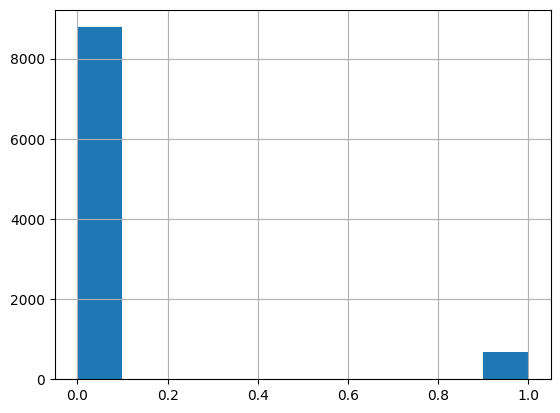

In [16]:
train_set[target].hist();

La variable target está muy desbalanceada. Tiene un 92.8% de personas que no han tenido un impago en los últimos dos años, mientras que un 7% ha tenido impago. Aunque sea una variable desbalanceada podemos decir que es positivo ya que hay poco porcentaje de impagos.

#### Análisis bivariante con la target

Variables numéricas

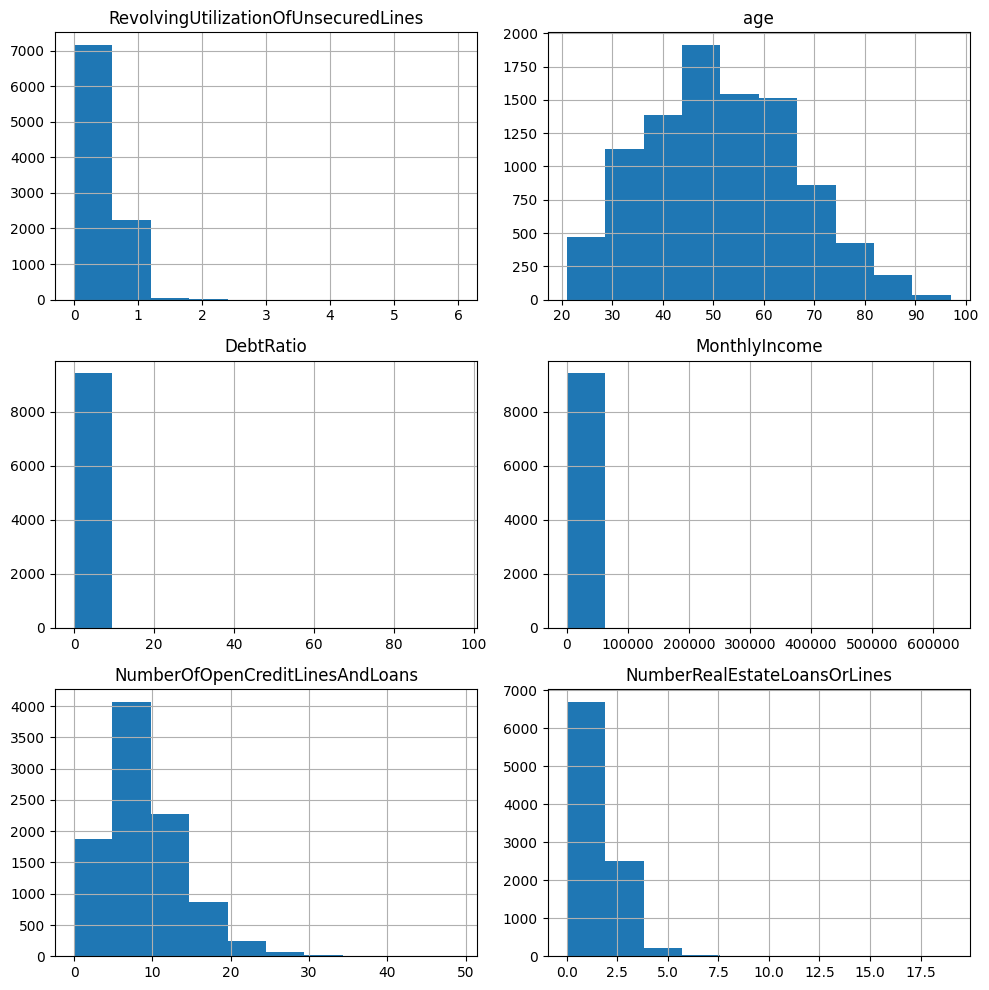

In [17]:
train_set[features_num].hist(figsize = (10,10))
plt.tight_layout();

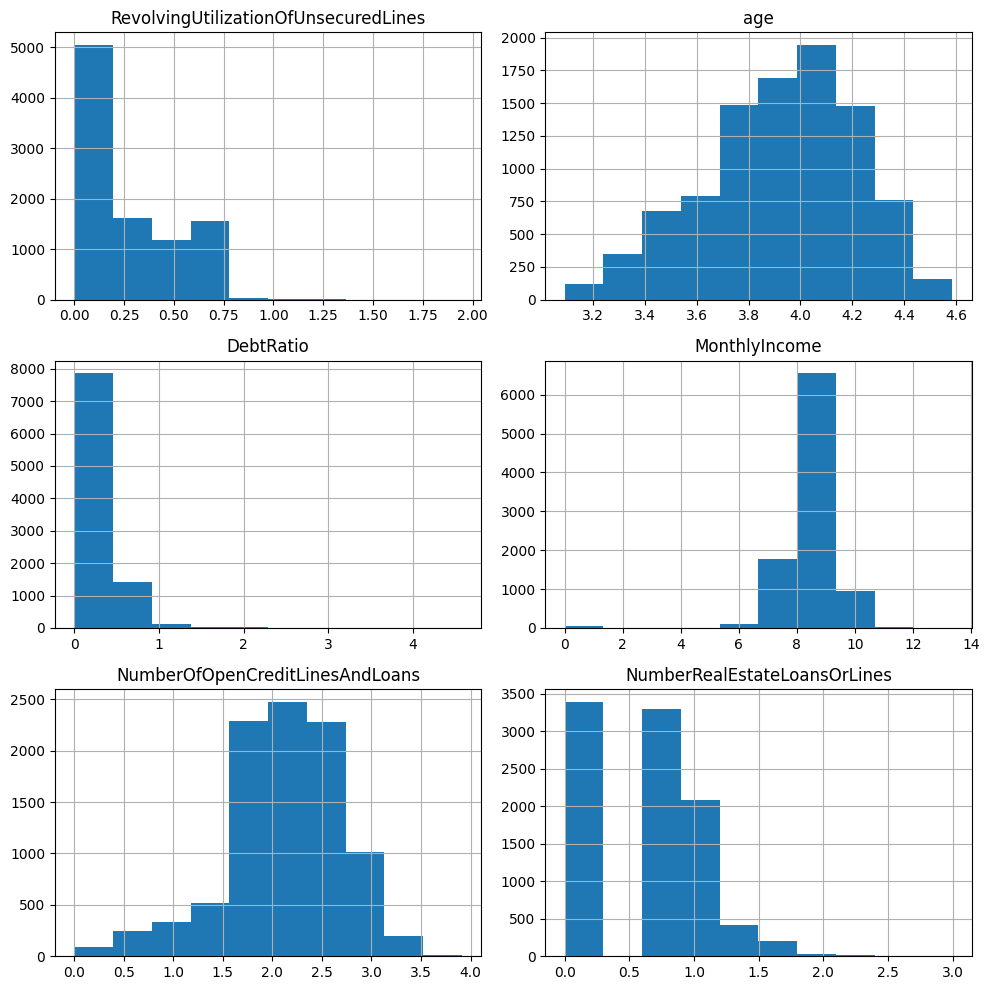

In [18]:
train_set_scaled = train_set
test_set_scaled = test_set

train_set_scaled[features_num] = np.log(train_set[features_num] + 1)
test_set_scaled[features_num] = np.log(test_set[features_num] + 1)

train_set_scaled[features_num].hist(figsize = (10,10))
plt.tight_layout();

In [19]:
scaler = StandardScaler()

In [20]:
train_set_scaled[features_num] = scaler.fit_transform(train_set_scaled[features_num])
test_set_scaled[features_num] = scaler.transform(test_set_scaled[features_num])

In [21]:
# for col in train_set[features_num]:
#     bt.plot_grouped_histograms(df = train_set, cat_col=target, num_col=col, group_size=2)

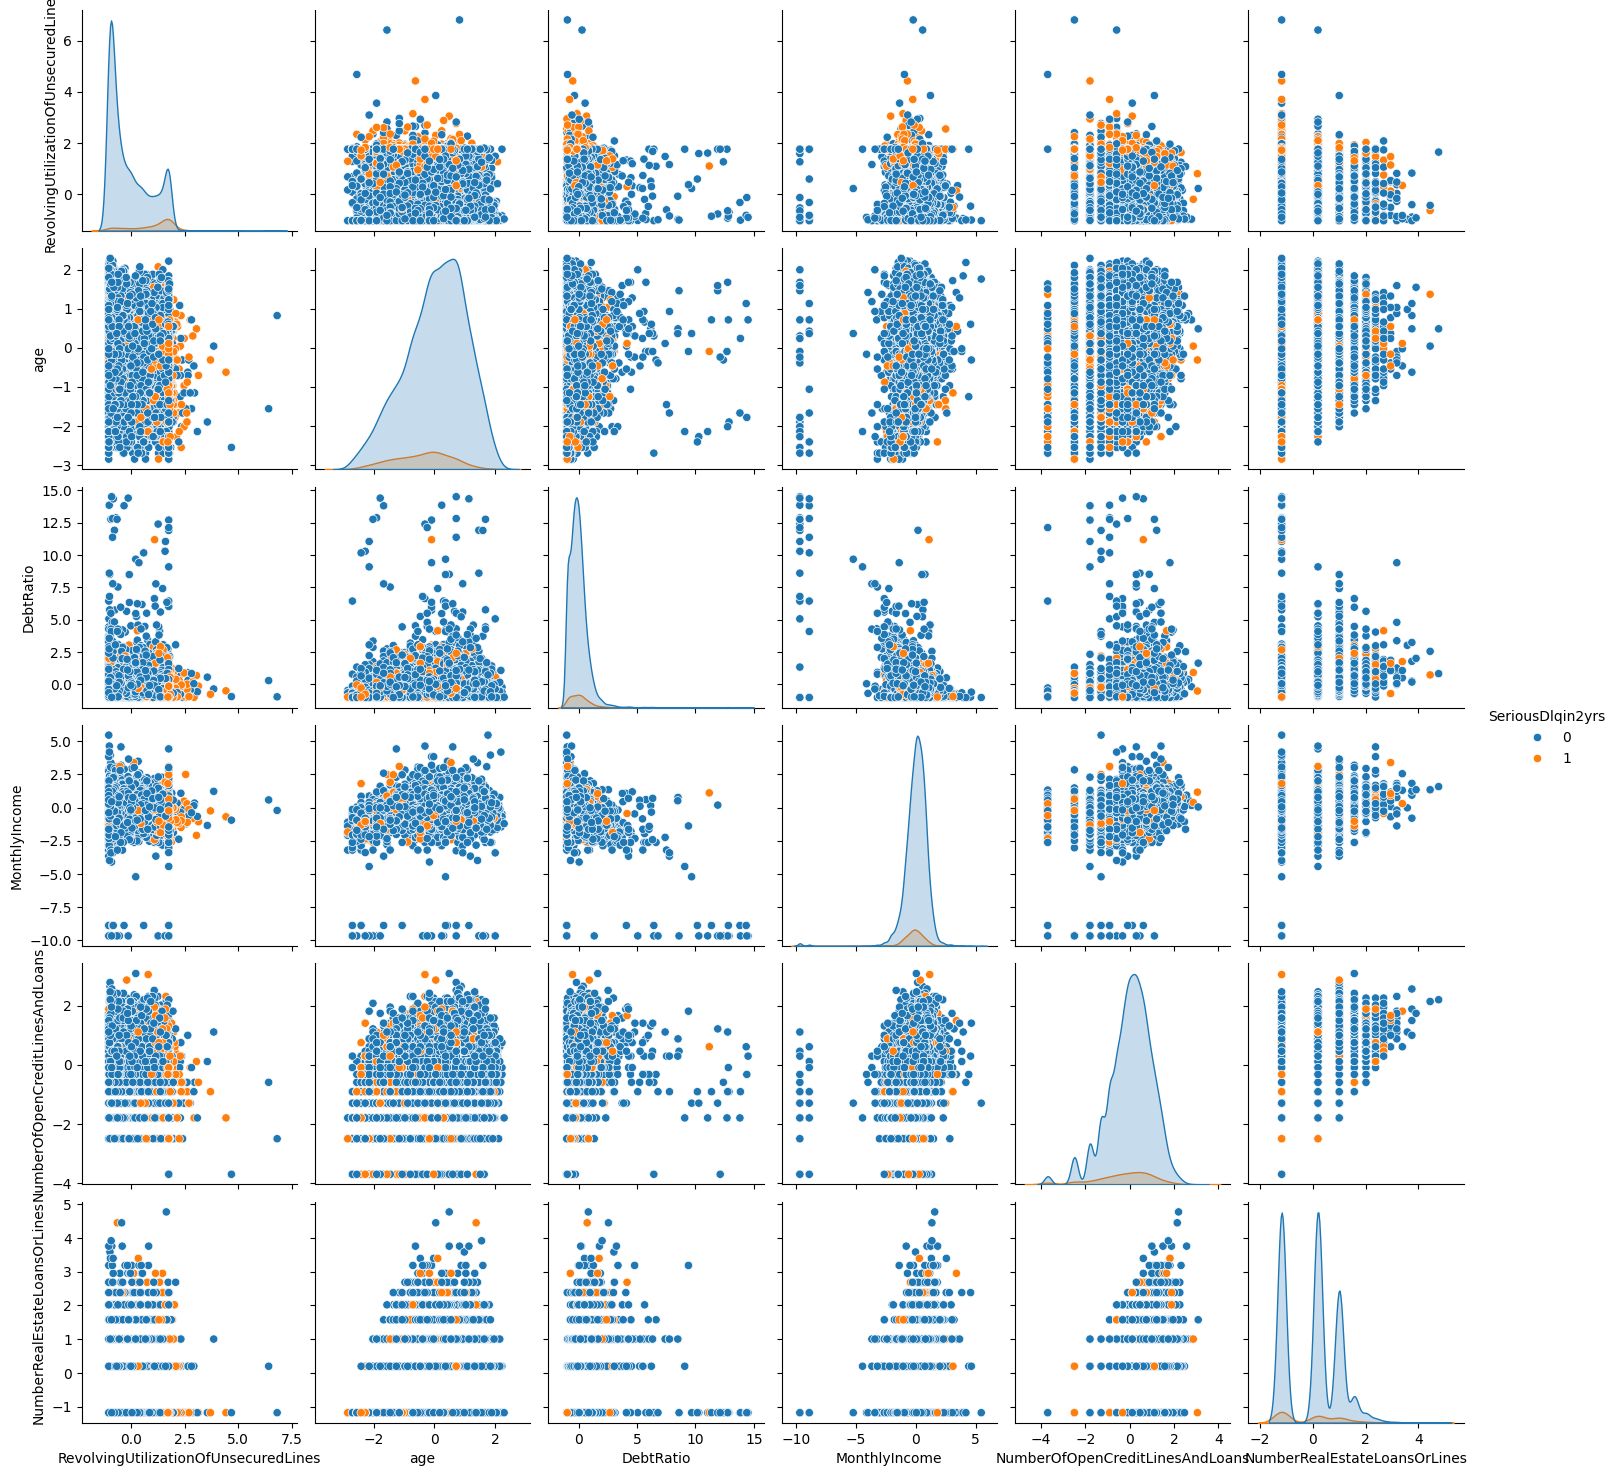

In [22]:
sns.pairplot(data=train_set[features_num + [target]], hue = target);

Correlación ``ANOVA``

In [23]:
from scipy.stats import f_oneway
 
for col in features_num:
    grupo_0 = train_set[train_set[target] == 0][col]
    grupo_1 = train_set[train_set[target] == 1][col]
    estadistico, p_value = f_oneway(grupo_0, grupo_1)
    print(f"{col}: p_value = {p_value:.5f}")
    if p_value < 0.05:
        print(f"La variable '{col}' tiene relación significativa con la target ")

RevolvingUtilizationOfUnsecuredLines: p_value = 0.00000
La variable 'RevolvingUtilizationOfUnsecuredLines' tiene relación significativa con la target 
age: p_value = 0.00000
La variable 'age' tiene relación significativa con la target 
DebtRatio: p_value = 0.01070
La variable 'DebtRatio' tiene relación significativa con la target 
MonthlyIncome: p_value = 0.00416
La variable 'MonthlyIncome' tiene relación significativa con la target 
NumberOfOpenCreditLinesAndLoans: p_value = 0.00000
La variable 'NumberOfOpenCreditLinesAndLoans' tiene relación significativa con la target 
NumberRealEstateLoansOrLines: p_value = 0.01358
La variable 'NumberRealEstateLoansOrLines' tiene relación significativa con la target 


Realizando el ANOVA test se observa que todas las variables establecidas como numéricas obtienen un p_value inferior a 0.05, lo que significa que tienen una relación significativa con la variable target.

### Selección de features con ``ANOVA``. 
Como solo hay un total de 6 features numéricas, probaremos a quedarnos con 4.

In [24]:
from sklearn.feature_selection import SelectKBest, f_classif

x_train_num = train_set[features_num]
y_train = train_set[target]
selector = SelectKBest(f_classif, k = 4)
x_data_kbest = selector.fit_transform(x_train_num, y_train)
x_train_best = pd.DataFrame(x_data_kbest, columns = selector.get_feature_names_out())
x_train_best

,RevolvingUtilizationOfUnsecuredLines,age,MonthlyIncome,NumberOfOpenCreditLinesAndLoans
0,0.547479,-0.094645,-1.026604,0.879055
1,-0.889161,0.109782,0.420903,-0.323016
2,-0.840967,0.877435,0.607956,0.998704
3,-0.525955,0.602074,0.720236,1.497609
4,0.517951,-0.387603,0.969793,0.879055
...,...,...,...,...
9447,-0.654789,0.364726,-1.052942,0.295537
9448,-0.048578,1.323550,-0.013776,0.295537
9449,-0.152639,1.132380,-1.123102,1.739987
9450,0.093733,-1.252169,0.772466,-0.590348


In [25]:
anova_features = x_train_best.columns.to_list()

Añadir las features seleccionadas a una lista para el modelo

In [26]:
selected_num_features = x_train_best.columns.to_list()
selected_num_features

['RevolvingUtilizationOfUnsecuredLines',
 'age',
 'MonthlyIncome',
 'NumberOfOpenCreditLinesAndLoans']

Variables categóricas

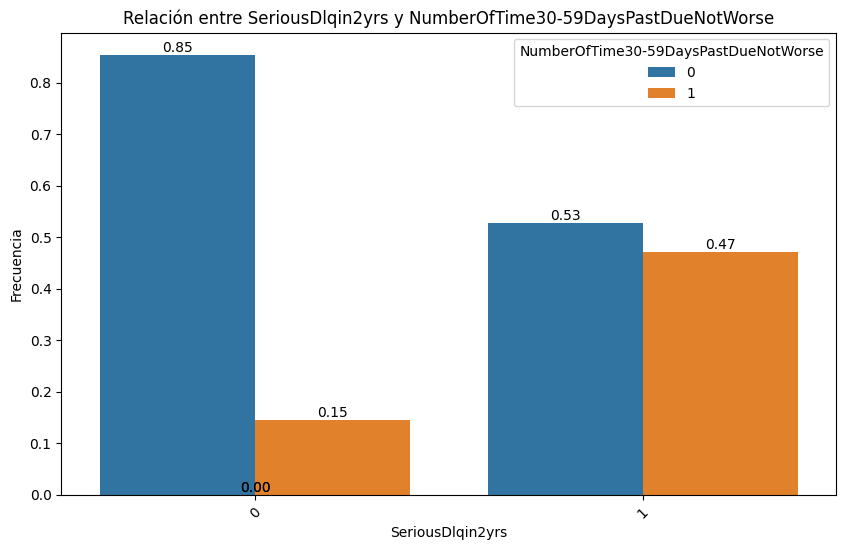

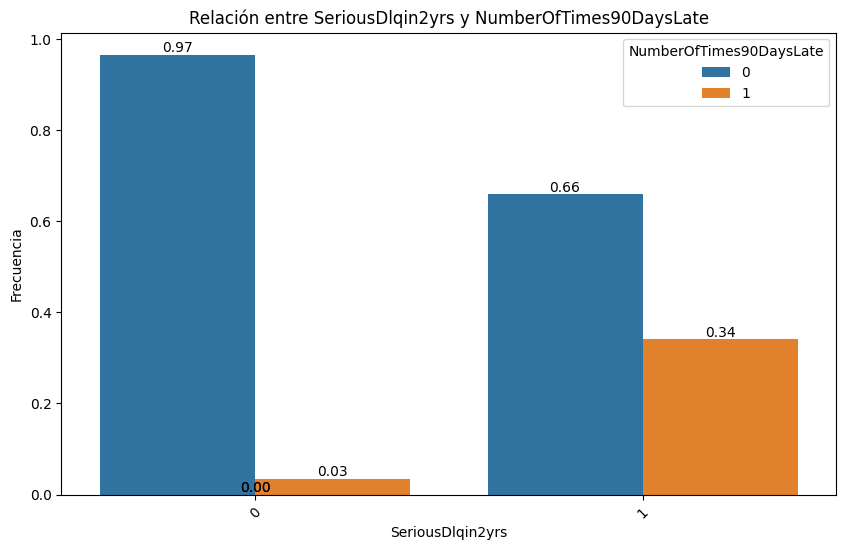

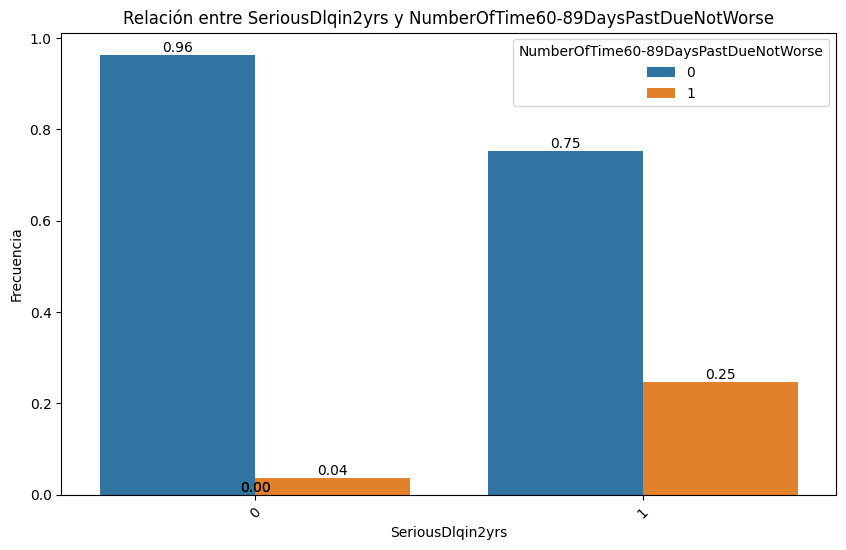

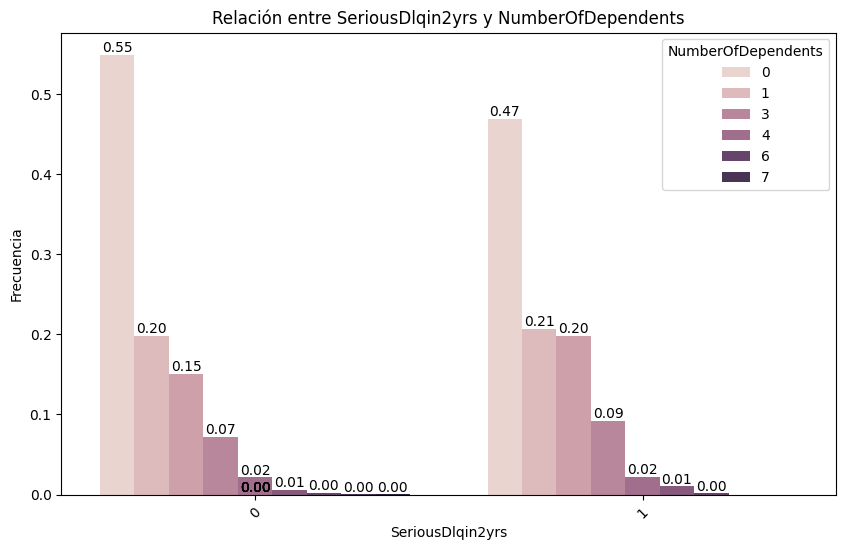

In [27]:
for col in train_set[features_cat]:
    bt.plot_categorical_relationship_fin(df = train_set, cat_col1=target, cat_col2=col, relative_freq=True, show_values=True)

Correlación de las variables categóricas con la target

### Correlación con `Mutual Information` y selección de las variables categóricas.

In [28]:
from sklearn.feature_selection import mutual_info_classif

selected_cat_features = []
mutual_info = mutual_info_classif(train_set[features_cat], train_set[target], random_state=42)

for col, score in zip(features_cat, mutual_info):
    print(f"MI({col}; {target}): {score:.5f}")
    if score > 0.015:
        print(f"La feature {col} se guarda para la selección")
        selected_cat_features.append(col)

MI(NumberOfTime30-59DaysPastDueNotWorse; SeriousDlqin2yrs): 0.01436
MI(NumberOfTimes90DaysLate; SeriousDlqin2yrs): 0.03106
La feature NumberOfTimes90DaysLate se guarda para la selección
MI(NumberOfTime60-89DaysPastDueNotWorse; SeriousDlqin2yrs): 0.01491
MI(NumberOfDependents; SeriousDlqin2yrs): 0.00004


In [29]:
mi_features = selected_cat_features

In [30]:
selected_features = selected_num_features + selected_cat_features
selected_features

['RevolvingUtilizationOfUnsecuredLines',
 'age',
 'MonthlyIncome',
 'NumberOfOpenCreditLinesAndLoans',
 'NumberOfTimes90DaysLate']

### Selección de features a través de un modelo intermedio: `RandomForestClassifier`

In [31]:
x_train = train_set.drop(columns=target, axis = 1)
y_train = train_set[target]

x_test = test_set.drop(columns=target, axis = 1)
y_test = test_set[target]

In [32]:
rf_clf = RandomForestClassifier(random_state=33, class_weight='balanced')
rf_clf.fit(x_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=33)

In [33]:
importances = rf_clf.feature_importances_
importances_df = pd.DataFrame({'Feature':(features_num + features_cat), 'Importance':importances})
importances_df

,Feature,Importance
0,RevolvingUtilizationOfUnsecuredLines,0.285369
1,age,0.128535
2,DebtRatio,0.063229
3,MonthlyIncome,0.131595
4,NumberOfOpenCreditLinesAndLoans,0.122696
5,NumberRealEstateLoansOrLines,0.082334
6,NumberOfTime30-59DaysPastDueNotWorse,0.069999
7,NumberOfTimes90DaysLate,0.038454
8,NumberOfTime60-89DaysPastDueNotWorse,0.039724
9,NumberOfDependents,0.038066


#### Aplicación de `SelectFromModel` para la selección de features.

In [34]:
from sklearn.feature_selection import SelectFromModel

selector = SelectFromModel(estimator=rf_clf, threshold='mean', max_features=5)
selector.fit(x_train, y_train)

x_train_selected = selector.transform(x_train)
x_test_selected = selector.transform(x_test)

selected_features_sfm = x_train.columns[selector.get_support()]

Estas son las features que obtenemos una vez realizado un modelo previo y aplicando `SelectFromModel`

In [35]:
selected_features_sfm

Index(['RevolvingUtilizationOfUnsecuredLines', 'age', 'DebtRatio',
       'MonthlyIncome'],
      dtype='object')

### Selección de features con `RFE`

In [36]:
from sklearn.feature_selection import RFE

rfe = RFE(estimator=rf_clf,
          n_features_to_select=5,
          step = 1)

rfe.fit(x_train, y_train)

print(rfe.ranking_)
features_rfe_df = pd.DataFrame(rfe.ranking_, columns= ["ranking"], index = (features_num + features_cat)).sort_values("ranking")
features_rfe_df

[1 1 3 1 1 1 2 5 4 6]


,ranking
RevolvingUtilizationOfUnsecuredLines,1
age,1
MonthlyIncome,1
NumberOfOpenCreditLinesAndLoans,1
NumberRealEstateLoansOrLines,1
NumberOfTime30-59DaysPastDueNotWorse,2
DebtRatio,3
NumberOfTime60-89DaysPastDueNotWorse,4
NumberOfTimes90DaysLate,5
NumberOfDependents,6


In [37]:
selected_features_rfe = [col for col in features_rfe_df.index if features_rfe_df.loc[col, "ranking"] == 1]
selected_features_rfe

['RevolvingUtilizationOfUnsecuredLines',
 'age',
 'MonthlyIncome',
 'NumberOfOpenCreditLinesAndLoans',
 'NumberRealEstateLoansOrLines']

Todas las features se mantienen igual que con el otro método, sin embargo la feature `DebtRatio` pasa a ser la peor para el modelo y es sustituida por `NumberOfOpenCreditLinesAndLoans`

### Selección de features con `SequentialFeatureSelection`

In [38]:
from sklearn.feature_selection import SequentialFeatureSelector

rf_SFS = RandomForestClassifier(random_state = 42)

sfs_forward = SequentialFeatureSelector(rf_SFS,
                                        n_features_to_select = 5,
                                        cv = 4,
                                        scoring = "balanced_accuracy")


sfs_forward.fit(x_train, y_train)

SequentialFeatureSelector(cv=4,
                          estimator=RandomForestClassifier(random_state=42),
                          n_features_to_select=5, scoring='balanced_accuracy')

In [39]:
print("Elegidas SFS:", sfs_forward.get_feature_names_out())

Elegidas SFS: ['RevolvingUtilizationOfUnsecuredLines' 'age' 'NumberOfTimes90DaysLate'
 'NumberRealEstateLoansOrLines' 'NumberOfTime60-89DaysPastDueNotWorse']


In [40]:
selected_features_sfs = sfs_forward.get_feature_names_out()

### Selección de features a través de un sistema de ``hard voting``

In [42]:
from collections import Counter

lista_features = list(selected_features) + list(selected_features_rfe) + list(selected_features_sfm) + list(selected_features_sfs)
votaciones = Counter(lista_features)
votaciones

Counter({'RevolvingUtilizationOfUnsecuredLines': 4,
         'age': 4,
         'MonthlyIncome': 3,
         'NumberOfOpenCreditLinesAndLoans': 2,
         'NumberOfTimes90DaysLate': 2,
         'NumberRealEstateLoansOrLines': 2,
         'DebtRatio': 1,
         'NumberOfTime60-89DaysPastDueNotWorse': 1})

In [40]:
x_train = train_set.drop(columns=[target], axis = 1)
y = train_set[target]

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(x_train, y_train)
rf_importance = rf.feature_importances_

mi = mutual_info_classif(x_train, y_train)
mi_importance = mi

# ANOVA
f_values, p_values = f_classif(x_train, y_train)
anova_importance = f_values

importance_dict = {
    'rf_importance': rf_importance,
    'mi_importance': mi_importance,
    'anova_importance': anova_importance
}

In [41]:
features = df.columns.to_list()
features.remove(target)

In [42]:
importance_df = pd.DataFrame(importance_dict, index = features)
importance_df

,rf_importance,mi_importance,anova_importance
RevolvingUtilizationOfUnsecuredLines,0.208920,0.043093,811.605214
age,0.127986,0.007858,113.755829
NumberOfTime30-59DaysPastDueNotWorse,0.027208,0.018462,499.543429
DebtRatio,0.162689,0.000216,6.517194
MonthlyIncome,0.161103,0.000000,8.214625
NumberOfOpenCreditLinesAndLoans,0.102935,0.000898,49.815963
NumberOfTimes90DaysLate,0.085941,0.032377,1258.276085
NumberRealEstateLoansOrLines,0.043147,0.000000,6.093637
NumberOfTime60-89DaysPastDueNotWorse,0.032484,0.017651,607.543086
NumberOfDependents,0.047587,0.000000,15.756941


In [43]:
threshold_rf = np.median(rf_importance)
threshold_mi = np.median(mi_importance)
threshold_anova = np.median(anova_importance)

votes = np.zeros(train_set.shape[1])

votes_rf = (rf_importance >= threshold_rf).astype(int)
votes_mi = (mi_importance >= threshold_mi).astype(int)
votes_anova = (anova_importance >= threshold_anova).astype(int)

votes = votes_rf + votes_mi + votes_anova

# Seleccionar las características que tienen mayoría de votos
selected_features_hardvoting = x_train.columns[votes >= 2] #características con al menos 2 votos positivos
print(f"Features seleccionadas: {selected_features}")

Features seleccionadas: ['RevolvingUtilizationOfUnsecuredLines', 'age', 'MonthlyIncome', 'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate']


3. Escoge tres modelos y a la hora compararlos para escoger el mejor, entrenalos con validación cruzada empleando las seis listas obtenidas anteriormente. Es decir tendrás 18 (6*3) medidas (emplea la métrica que creas más conveniente y si no se te ocurre ninguna el recall medio).  Escoge el mejor modelo y la mejor selección de features.

In [44]:
scale_pos_weight = len(y_train) / np.sum(y_train == 1)  # Calcula el peso para la clase positiva para XGB

set_features = [selected_features, selected_features_rfe, selected_features_sfm, 
                selected_features_sfs, selected_features_hardvoting]

models = (RandomForestClassifier(random_state=42, max_depth = 5, class_weight='balanced'),
          HistGradientBoostingClassifier(random_state=42, max_depth=5, class_weight='balanced'),
          XGBClassifier(random_state = 42, max_depth = 5, scale_pos_weight = scale_pos_weight))

model_names = ['Rf_clf','Histgb_clf','xgb_clf']

resultados = {}

for model, model_name in zip(models, model_names):
    for i, features in enumerate(set_features):
        X_subset = x_train[features]  # Selecciona solo las columnas de la lista actual
        scores = cross_val_score(model, X_subset, y_train, cv=5, scoring='balanced_accuracy')  
        resultados[f"{model_name}_features_{i}"] = scores.mean()

# Seleccionar el mejor modelo y feature set
best_model = max(resultados, key=resultados.get)
print(f"Mejor modelo y selección de features: {best_model} con score {resultados[best_model]:.4f}")

Mejor modelo y selección de features: Rf_clf_features_4 con score 0.7550


In [45]:
resultados

{'Rf_clf_features_0': 0.7419927381568493,
 'Rf_clf_features_1': 0.7183544250400742,
 'Rf_clf_features_2': 0.7173302117607356,
 'Rf_clf_features_3': 0.7523631274153152,
 'Rf_clf_features_4': 0.7549814518901317,
 'Histgb_clf_features_0': 0.7241554691739983,
 'Histgb_clf_features_1': 0.7059186477130923,
 'Histgb_clf_features_2': 0.7015434533231086,
 'Histgb_clf_features_3': 0.7405907629657331,
 'Histgb_clf_features_4': 0.7367264097130143,
 'xgb_clf_features_0': 0.6695398733993912,
 'xgb_clf_features_1': 0.6518716843522203,
 'xgb_clf_features_2': 0.6306991239701266,
 'xgb_clf_features_3': 0.6931339757804247,
 'xgb_clf_features_4': 0.698267741273385}

4. Optimiza los hiperparámetros del mejor modelo. Evalúalo contra test.


In [46]:
rf_clf = RandomForestClassifier(random_state=42, class_weight='balanced')
rf_clf.fit(x_train[selected_features_hardvoting], y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [47]:
y_pred = rf_clf.predict(x_test[selected_features_hardvoting])
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.96      0.95      2206
           1       0.32      0.26      0.28       158

    accuracy                           0.91      2364
   macro avg       0.63      0.61      0.62      2364
weighted avg       0.91      0.91      0.91      2364



In [48]:
param_grid = {
    'n_estimators': [50, 100, 200],  # Número de árboles en el bosque
    'max_depth': [None, 10, 20, 30],  # Profundidad máxima de los árboles
    'min_samples_split': [2, 5, 10],  # Mínimo número de muestras para dividir un nodo
    'max_features': ['sqrt', 'log2', None],  # Corrige el valor 'auto'
    }

best_model_grid = GridSearchCV(
    param_grid= param_grid,
    estimator=rf_clf,
    cv = 5,
    scoring = 'balanced_accuracy'
)

best_model_grid.fit(x_train[selected_features_hardvoting], y_train)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              random_state=42),
             param_grid={'max_depth': [None, 10, 20, 30],
                         'max_features': ['sqrt', 'log2', None],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='balanced_accuracy')

In [49]:
best_model_grid.best_score_

0.707705770061361

In [50]:
y_pred = best_model_grid.best_estimator_.predict(x_test[selected_features_hardvoting])
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.84      0.90      2206
           1       0.20      0.55      0.30       158

    accuracy                           0.82      2364
   macro avg       0.58      0.70      0.60      2364
weighted avg       0.91      0.82      0.86      2364



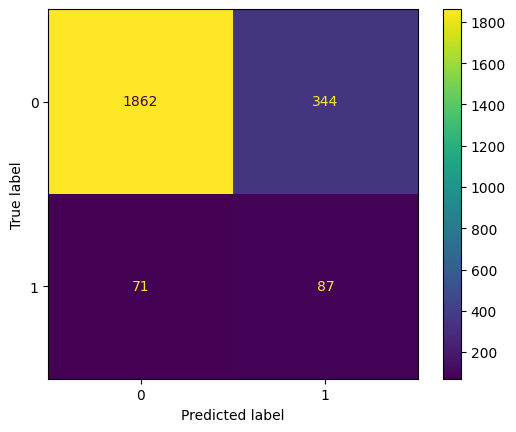

In [51]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred);

### EXTRA

Aplica la PCA como método de selección, escoge un número de componentes en función de la varianza explicada y crea un dataset con el que entrenar el mismo tipo de modelo ganador de la parte general. Entrenalo y evalúalo contra test, comenta el resultado.